In [275]:
files <- dir("functions",full.names=TRUE)
for(i in 1:length(files)) source(files[i])
data <- read.csv("transformer_data.csv", header = TRUE, sep = ",")

In [177]:
kf_logLik_dt1d(par = c(0.5,0.5,0.5,0.5,0.5,0.5,0.5),df=data)

[1]  10.74572  14.80855  14.07918  13.31672  13.12762  13.13539  13.61504
  [8]  18.53119  31.26225  48.27037  77.56484 106.03889 143.54888 176.38236
 [15] 162.11724 129.91111 111.27271  74.12914  53.89154  40.65325  27.20581
 [22]  20.05404  16.78941  15.28369  14.52154  13.91302  13.64839  13.42653
 [29]  13.31579  13.13975  13.76865  20.07642  31.65916  64.41916 110.94669
 [36] 130.90155 112.86441 107.82688 126.18402 145.47334 174.39879 136.05051
 [43] 100.25595  63.90145  37.51450  24.67142  18.86078  15.94613  14.54373
 [50]  13.71543  13.30118  13.01472  13.01439  12.94197  17.11267  45.73040
 [57]  95.59778 153.62496 209.90477 259.50074 298.46952 323.69688 329.65052
 [64] 314.79673 280.06022 236.10547 183.02652 121.81052  65.85953  36.81968
 [71]  23.77833  17.88478  15.05657  13.64084  12.66344  12.16380  12.08772
 [78]  11.75878  16.36137  46.04489  95.76723 154.05715 213.05037 266.60306
 [85] 305.66342 328.21683 333.67940 320.19162 288.69975 242.79749 176.04851
 [92] 110.99561  60.78802  34.66483  23.14845  17.92424  15.59499  13.98808
 [99]  13.07053  12.77291  12.21094  11.99274  17.77586  50.34533 102.60398
[106] 163.14109 222.87958 274.98937 313.18314 335.70860 340.26010 326.77026
[113] 293.35793 246.55259 191.00242 128.77182  70.52961  39.09247  25.16831
[120]  18.80467  15.78440  14.32635  13.41517  13.00657  12.68059  12.61386
[127]  17.74178  48.37313  98.60728 154.83205 139.14258 222.04728 283.45260
[134] 316.13098 321.76882 310.80511 278.66088 232.53590 178.82828 119.88813
[141]  66.40399  37.85395  25.17659  19.44366  16.67803  15.30792  14.57367
[148]  14.22030  13.75063  13.53887  18.41689  43.84931  96.41356 159.14323
[155] 219.79920 271.26530 309.47286 330.61207 333.18384 319.91233 290.25053
[162] 247.06843 193.88460 132.85086  73.75351  40.55003  25.71649  18.85654

In [ ]:
set.seed(1000)
par1d <- estimate_dt1d(start_par = c(runif(15,-1,1),0.5),df=data,lower = c(rep(-Inf,10),1e-5,1e-5,1e-5,-Inf,-Inf,1e-5),upper = Inf)$par
set.seed(1000)
par2d <- estimate_dt(start_par = c(runif(15,-1,1),0.5),df=data,lower = c(rep(-Inf,10),1e-5,1e-5,1e-5,-Inf,-Inf,1e-5), upper = Inf)$par

print(par1d)
print("\n")
print(par2d)


iter   10 value 6588.421255
iter   20 value 249.479246
iter   30 value 248.870067
iter   40 value 245.158653
iter   50 value 244.707204
iter   60 value 244.582496
iter   70 value 242.828855
iter   80 value 239.608780
iter   90 value 237.955384
iter  100 value 236.596670
iter  110 value 235.875642
iter  120 value 235.370848
iter  130 value 235.114383
iter  140 value 234.428282
iter  150 value 234.040510
iter  160 value 233.875460
iter  170 value 233.390618
iter  180 value 233.140720
iter  190 value 232.600683
iter  200 value 232.260729
iter  210 value 231.938393
iter  220 value 231.811910
iter  230 value 231.768138
iter  240 value 231.534331
iter  250 value 231.465898
iter  260 value 231.421453
iter  270 value 231.381294
iter  280 value 231.361927
iter  290 value 231.350491
iter  300 value 231.265284
iter  310 value 231.122792
iter  320 value 231.121058
iter  330 value 231.116113
iter  340 value 231.082226
iter  350 value 230.979934
iter  360 value 230.968521
iter  370 value 230.956348


[1] 0.1298745


[1] 1.073001


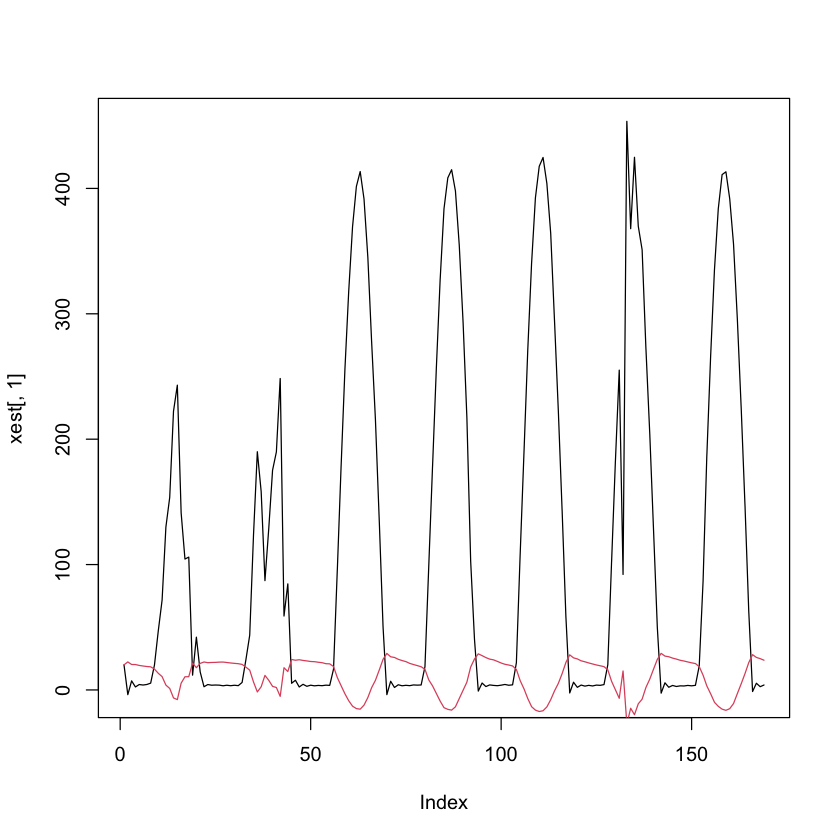

In [277]:
xest <-kf_logLik_dt(par=par2d,df=data)
plot(xest[,1],type="l")
lines(xest[,2],type="l",col=2)
print(par2d[14])
print(par2d[15])

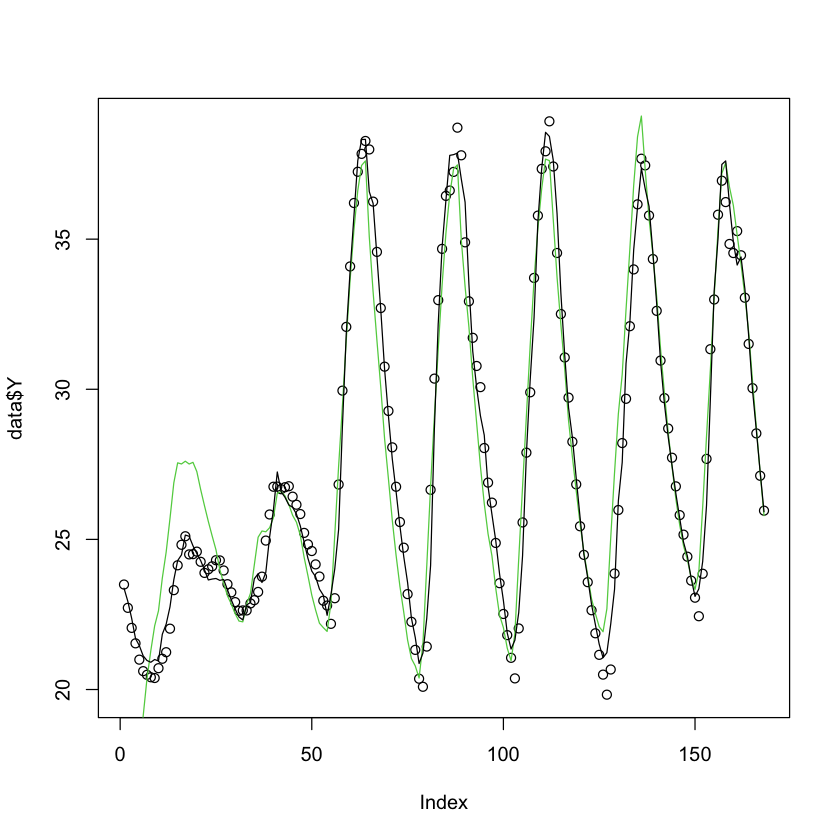

In [271]:
plot(data$Y)
lines(kf_logLik_dt1d(par=par1d,df = data),col = 3)
lines(kf_logLik_dt(par=par2d,df = data),col=1)


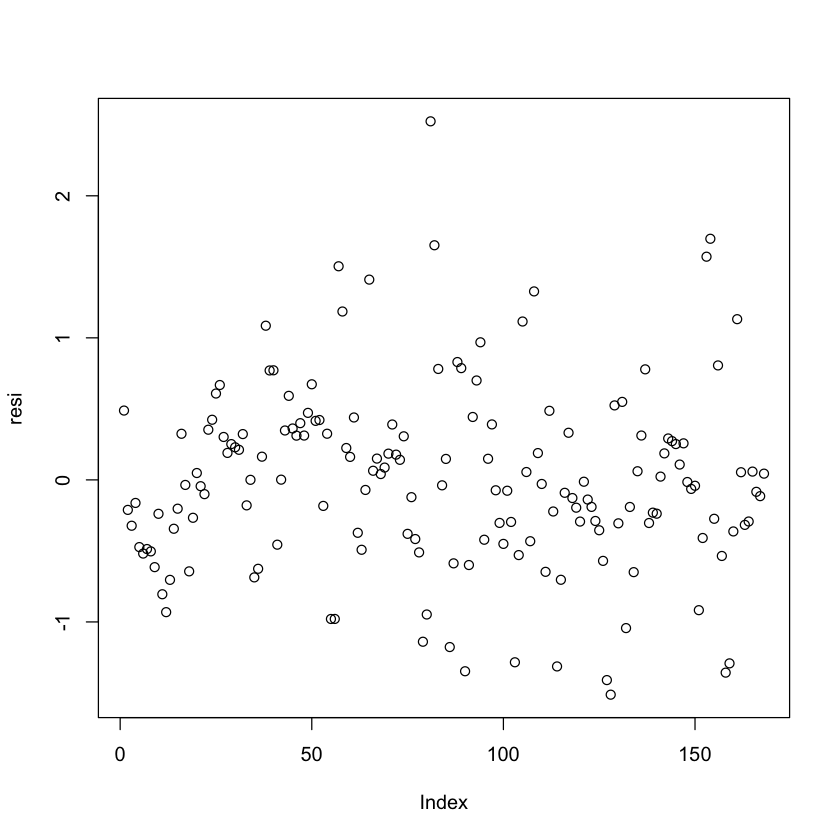

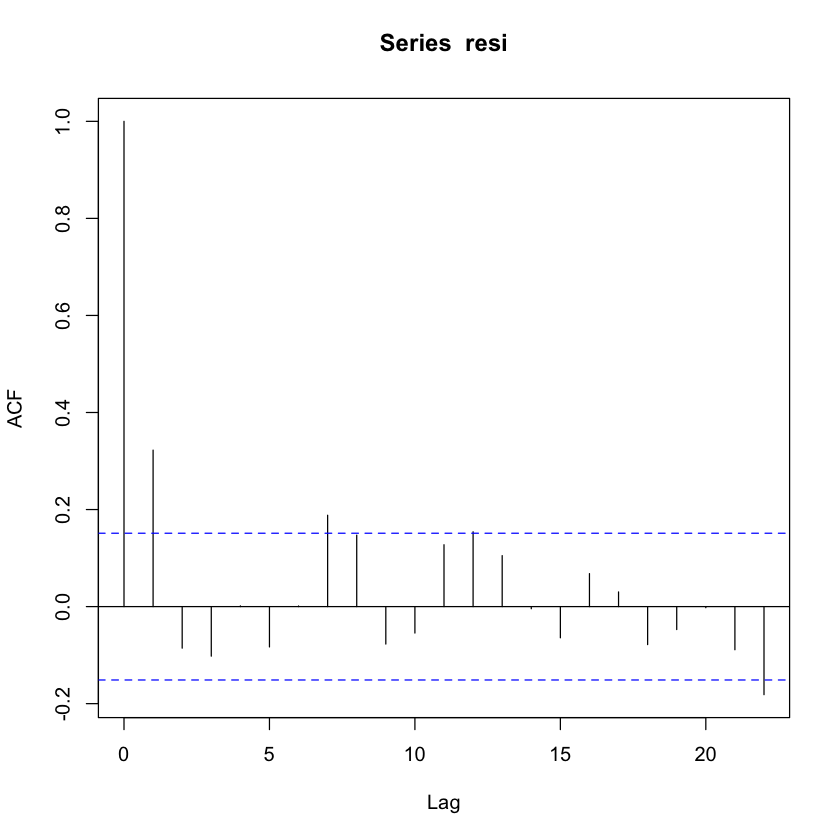

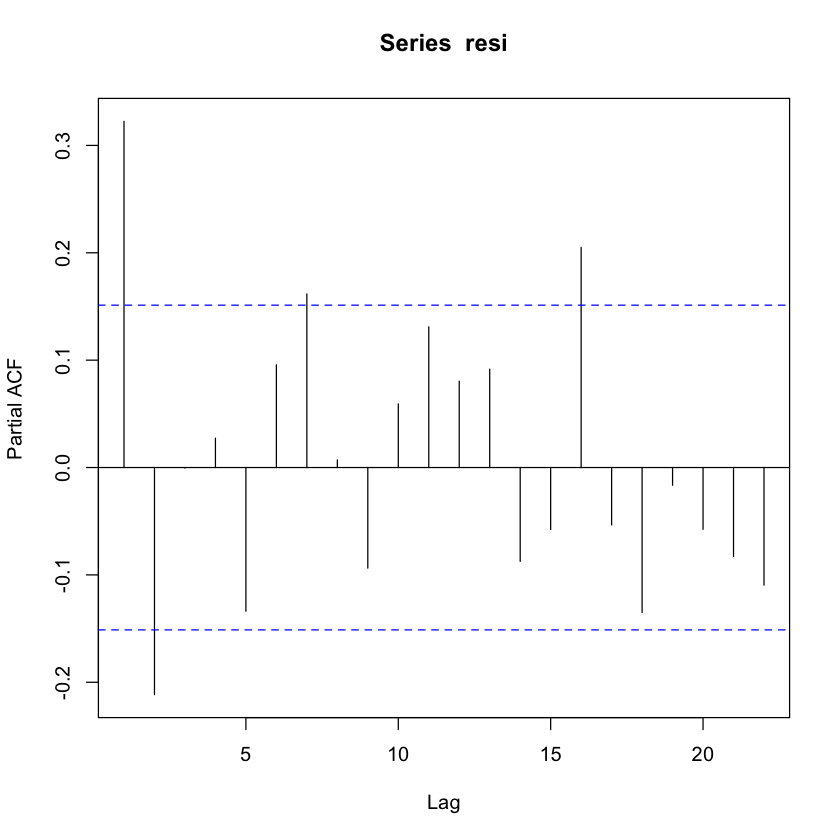

In [ ]:
resi <- data$Y-kf_logLik_dt1d(par=par,df = data)
plot(resi)
acf(resi)
pacf(resi)

In [232]:
set.seed(25)
ypred <- estimate_dt(start_par = runif(16,-1,1),df=data,lower = c(rep(-1,10), 1e-4, -10, 1e-4, -10, -10, 1e-4),upper =  c(rep( 1,10),10, 10, 10,10, 10,10))
plot(data$Y)
lines(ypred)

iter   10 value 918.135062
iter   20 value 899.341117
iter   30 value 872.180078
iter   40 value 803.646905
iter   50 value 779.644456
iter   60 value 692.093890
iter   70 value 485.330196
iter   80 value 418.620832
iter   90 value 372.191721
iter  100 value 314.651702
iter  110 value 284.775531
iter  120 value 281.825126
iter  130 value 274.122614
iter  140 value 231.487751
iter  150 value 222.203795
iter  160 value 222.172515
iter  170 value 221.965907
iter  180 value 221.306664
iter  190 value 220.132204
iter  200 value 220.014262
final  value 220.009731 
converged


ERROR: Error in estimate_dt(start_par = runif(16, -1, 1), df = data, lower = c(rep(-1, : objekt 'yy' blev ikke fundet


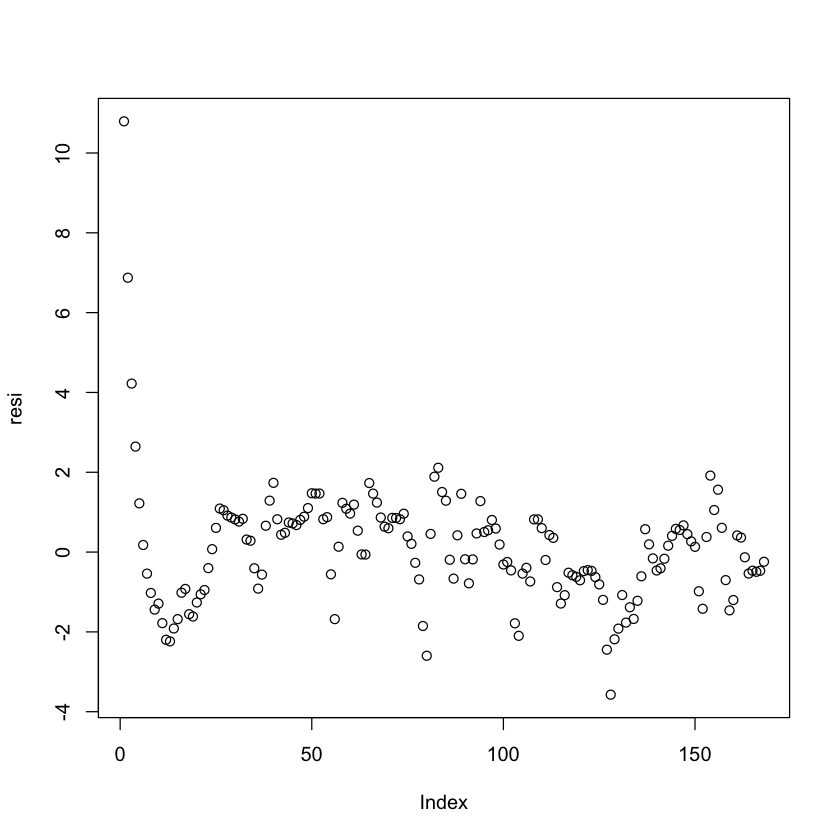

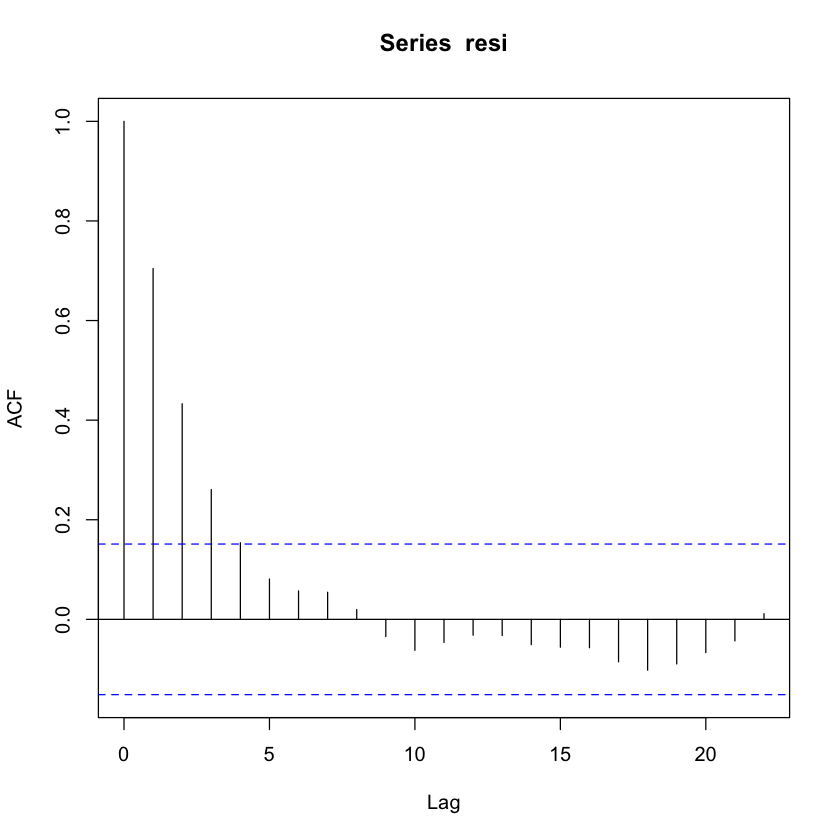

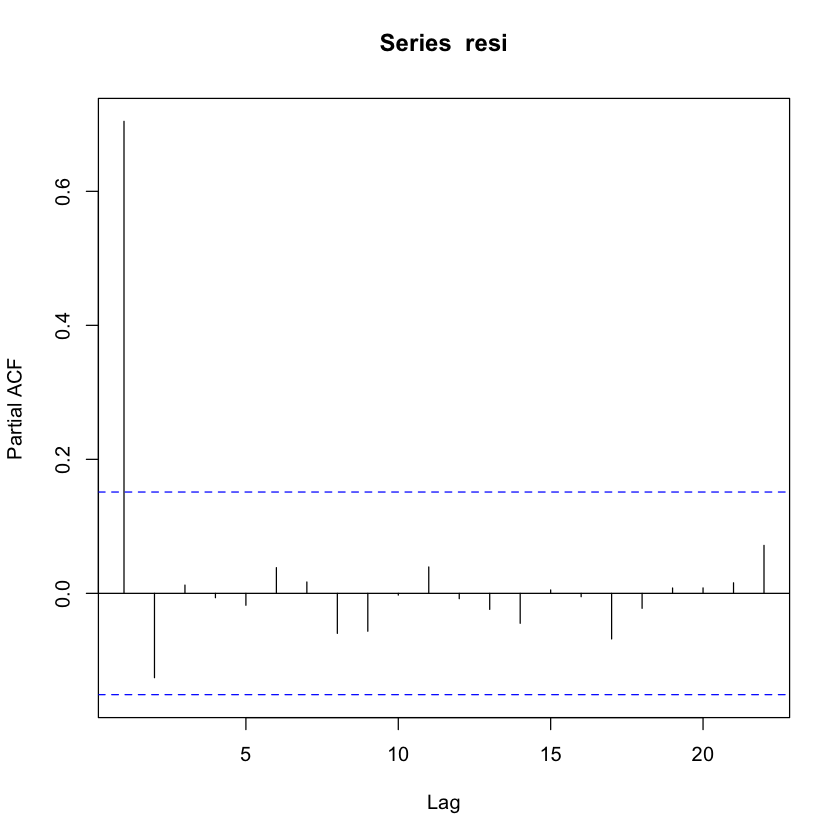

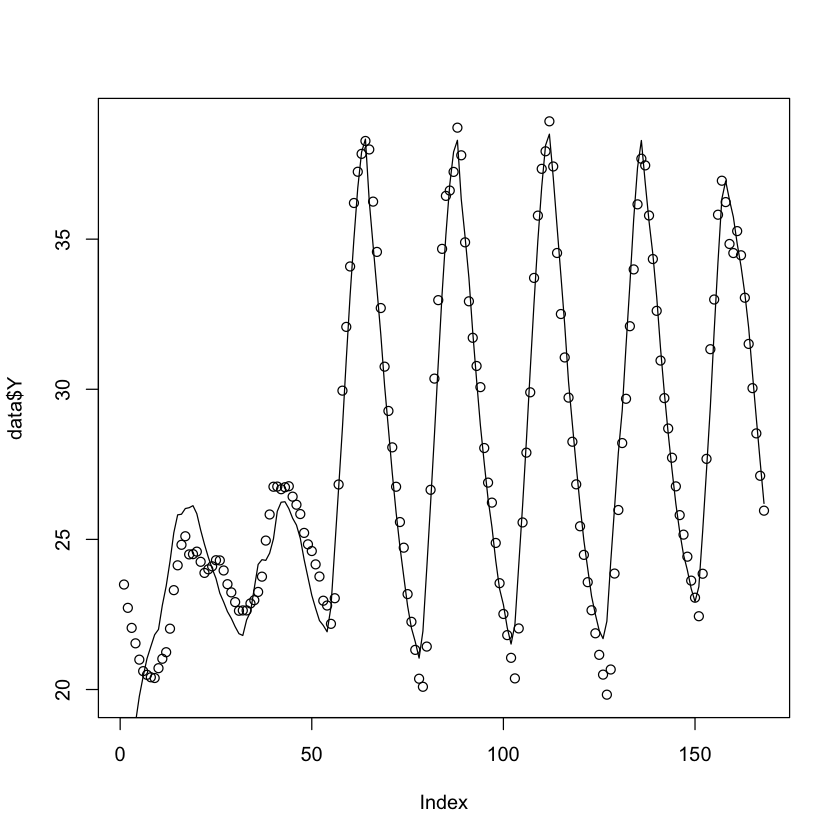

In [218]:
ypred <-kf_logLik_dt(par = par,df = data)
resi<-data$Y-ypred
plot(resi)

acf(resi)
pacf(resi)
plot(data$Y)
lines(ypred)

In [222]:
x <- kf_logLik_dt(par = par,df = data)

ERROR: Error in xx[t, ] <- t(x_est): number of items to replace is not a multiple of replacement length
